### Create plots for the results
Use seaborn lineplot 
https://stackabuse.com/seaborn-line-plot-tutorial-and-examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [85]:
#abs_path   = os.path.dirname(os.path.abspath(__file__)) + '/'

In [86]:
safe_maddpg_soft = '../data/agents/SafeMADDPG_soft/'
safe_maddpg_hard = '../data/agents/SafeMADDPG_hard/'
maddpg_vanilla   = '../data/agents/MADDPG/'
safe_maddpg_soft_rewards = '../data/agents/SafeMADDPG_soft_rewards/'

In [12]:
seed_range = np.arange(5,11)
N = 8000

In [93]:
rewards_soft    = []
rewards_hard    = []
rewards_maddpg = []
rewards_seed=[]
rewards_safe_rew =[]

collisions_seed=[]
collisions_soft=[]
collisions_maddpg=[]
collisions_soft_rewards= []
    
infeasibilities_soft = []
infeasibilities_hard = []

In [67]:
#list(range(0,8000, 10))*2

In [94]:
for seed in seed_range:
    

    # Import Results
    
    #rewards:
    rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    #rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N])
    rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    #collisions_hard = np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'collisions.npy')[0:N]
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col= list(range(0,8000))*len(rewards_soft)

In [58]:
rewards_soft_list = [item for sublist in rewards_soft for item in sublist]
rewards_maddpg_list = [item for sublist in rewards_maddpg for item in sublist]
rewards_seed_list= [item for sublist in rewards_seed for item in sublist]
rewards_type=['soft_MADDPG']*len(rewards_soft_list) + ['MADDPG']*len(rewards_maddpg_list)

In [63]:
rewards_df=pd.DataFrame()
rewards_df['type']=rewards_type
rewards_df['seed']=rewards_seed_list*2
rewards_df['reward']=rewards_soft_list + rewards_maddpg_list
rewards_df['episode']=episodes_list_rew*2

In [ ]:
rewards_df.head()

In [96]:
collisions_soft_list = [item for sublist in collisions_soft for item in sublist]
collisions_soft_rewards_list = [item for sublist in collisions_soft_rewards for item in sublist]
collisions_maddpg_list = [item for sublist in collisions_maddpg for item in sublist]
collisions_seed_list= [item for sublist in collisions_seed for item in sublist]
collisions_type=['soft_MADDPG']*len(collisions_soft_list) + ['MADDPG']*len(collisions_maddpg_list) + ['soft_MADDPG_rewards']*len(collisions_soft_rewards_list)

In [97]:
collisions_df=pd.DataFrame()
collisions_df['Type']=collisions_type
collisions_df['Seed']=collisions_seed_list*3
collisions_df['Total Collisions']=collisions_soft_list + collisions_maddpg_list + collisions_soft_rewards_list
collisions_df['Episode']=episodes_list_col*3

In [101]:
collisions_df

,Type,Seed,Total Collisions,Episode
0,soft_MADDPG,5,0,0
1,soft_MADDPG,5,0,1
2,soft_MADDPG,5,0,2
3,soft_MADDPG,5,0,3
4,soft_MADDPG,5,1,4
...,...,...,...,...
143995,soft_MADDPG_rewards,10,2510,7995
143996,soft_MADDPG_rewards,10,2510,7996
143997,soft_MADDPG_rewards,10,2510,7997
143998,soft_MADDPG_rewards,10,2510,7998


### Plot for rewards: 

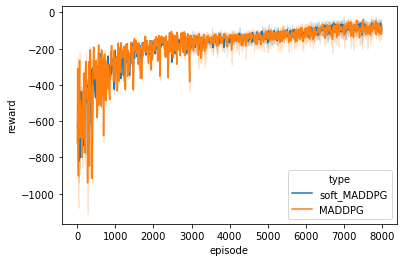

In [66]:
sns.lineplot(x = "episode", y = "reward",hue='type', data = rewards_df)
plt.show()

### Plot for collisions:

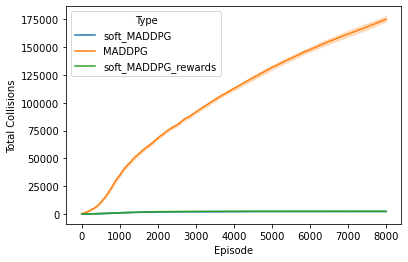

In [102]:
sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', data = collisions_df)
plt.show()

In [103]:
collisions_soft_df=collisions_df[collisions_df['Type']!= 'MADDPG']

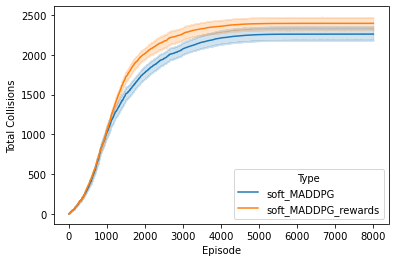

In [106]:
sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', data = collisions_soft_df)
plt.show()